<a href="https://colab.research.google.com/github/KEDAR30/8-may-exam-question/blob/main/ml_05_08_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Unsupervised ML:
# Application
# Customer segmenatation(group) based on the similar Features

In [ ]:
#clustering(Grouping)
# Age:20,23,33,69,56,45,12,16
# G1:16,20,23   clustering 1
# G2:33,45      clustering 2
# G3:56,69      clustering 3

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as  plt
import seaborn as sns


In [ ]:
df=pd.read_csv('/content/Live (1).csv')

In [ ]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [ ]:
df.drop(['Column1','Column2','Column3','Column4'],axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   object
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 661.1+ KB


In [ ]:
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


In [ ]:
len(df['status_id'].unique())

6997

In [ ]:
len(df['status_published'].unique())

6913

In [ ]:
df['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [ ]:
df.drop(['status_published','status_id'],axis=1,inplace=True)

In [ ]:
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


In [ ]:
X=df
y=df['status_type']

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X['status_type']=le.fit_transform(X['status_type'])

In [ ]:
X.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0


In [ ]:
X['status_type'].unique()

array([3, 1, 0, 2])

In [ ]:
df['status_type'].unique()

array([3, 1, 0, 2])

In [ ]:
y

0       video
1       photo
2       video
3       photo
4       photo
        ...  
7045    photo
7046    photo
7047    photo
7048    photo
7049    photo
Name: status_type, Length: 7050, dtype: object

In [ ]:
y=le.transform(y)


In [ ]:
y

array([3, 1, 3, ..., 1, 1, 1])

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   status_type    7050 non-null   int64
 1   num_reactions  7050 non-null   int64
 2   num_comments   7050 non-null   int64
 3   num_shares     7050 non-null   int64
 4   num_likes      7050 non-null   int64
 5   num_loves      7050 non-null   int64
 6   num_wows       7050 non-null   int64
 7   num_hahas      7050 non-null   int64
 8   num_sads       7050 non-null   int64
 9   num_angrys     7050 non-null   int64
dtypes: int64(10)
memory usage: 550.9 KB


In [ ]:
X.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0


In [ ]:
# Feature scaling

In [ ]:
X.columns

Index(['status_type', 'num_reactions', 'num_comments', 'num_shares',
       'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads',
       'num_angrys'],
      dtype='object')

In [ ]:
df.isnull().sum()

status_type      0
num_reactions    0
num_comments     0
num_shares       0
num_likes        0
num_loves        0
num_wows         0
num_hahas        0
num_sads         0
num_angrys       0
dtype: int64

In [ ]:
df.shape

(7050, 10)

In [ ]:
col=X.columns

In [ ]:
from sklearn.preprocessing import MinMaxScaler #-- convert 0 to 1 , clustering is done by centroid method 
ms=MinMaxScaler()
X=ms.fit_transform(X)

In [ ]:
X=pd.DataFrame(X,columns=[col])
X.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


In [ ]:
# K Means
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3)
kmeans.fit(X)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


KMeans(n_clusters=3)

In [ ]:
len(kmeans.cluster_centers_)

3

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.

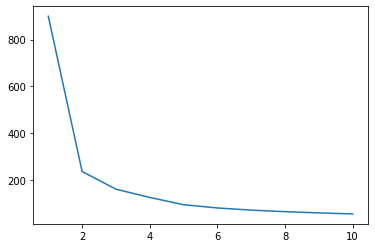

In [ ]:
cs=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300)
  kmeans.fit(X)
  cs.append(kmeans.inertia_)
plt.plot(range(1,11),cs)
plt.show()



In [ ]:
kmeans=KMeans(n_clusters=2)
kmeans.fit(X)
labels=kmeans.labels_
correct_lable=sum(y==labels)
print('%d out of %d sample were correctly labled'%(correct_lable,y.size))
print('Accuracy',correct_lable/float(y.size))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


4288 out of 7050 sample were correctly labled
Accuracy 0.6082269503546099


In [ ]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(X)
labels=kmeans.labels_
correct_lable=sum(y==labels)
print('%d out of %d sample were correctly labled'%(correct_lable,y.size))
print('Accuracy',correct_lable/float(y.size))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


4163 out of 7050 sample were correctly labled
Accuracy 0.5904964539007093


In [ ]:
kmeans=KMeans(n_clusters=4)
kmeans.fit(X)
labels=kmeans.labels_
correct_lable=sum(y==labels)
print('%d out of %d sample were correctly labled'%(correct_lable,y.size))
print('Accuracy',correct_lable/float(y.size))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


4347 out of 7050 sample were correctly labled
Accuracy 0.6165957446808511


In [ ]:
labels

array([0, 1, 0, ..., 1, 1, 1], dtype=int32)